In [3]:
%pylab inline
import pickle
import sys

sys.path.append('../util')
from data_handling import extractFeatures
from image import makeGrayScale

Populating the interactive namespace from numpy and matplotlib


C:\Users\prash\Anaconda_Setup\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
#Load data:
with open('../data/training_data.p', 'rb') as f:
    d = pickle.load(f)

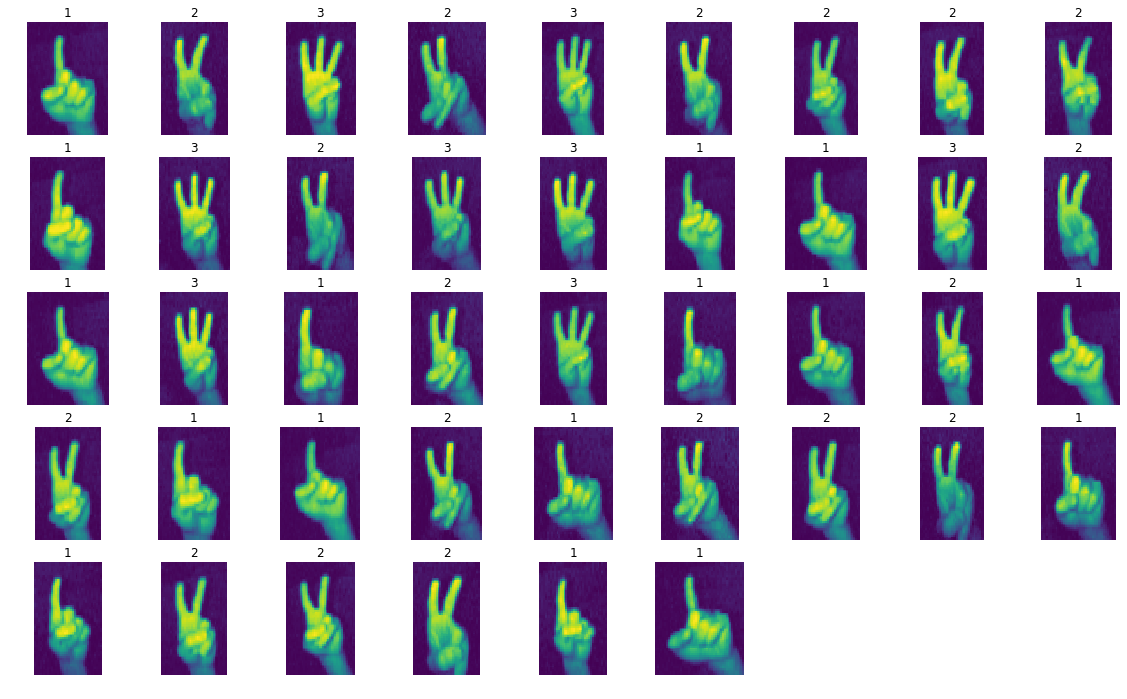

In [5]:

fig = figure(0, (20, 12))

for i in range(len(d)):
    fig.add_subplot(5, 9, i+1)
    
    cropped_image = d[i]['image'][d[i]['boxEdges'][2]:d[i]['boxEdges'][3], \
                                       d[i]['boxEdges'][0]:d[i]['boxEdges'][1]] 
    
    imshow(cropped_image)
    title(str(d[i]['numFingers']))
    axis('off')

In [6]:
len(d)


42

In [7]:
d[0].keys()


dict_keys(['box', 'boxHeight', 'handPoints', 'trackingIndices', 'allFingerPoints', 'boxWidth', 'image', 'boxEdges', 'croppedImage', 'numFingers', 'numPointsInBox', 'handEdges', 'indexFingerPoints', 'picCount', 'image1bit'])

In [8]:
exampleIndices = [7, 30, 38]


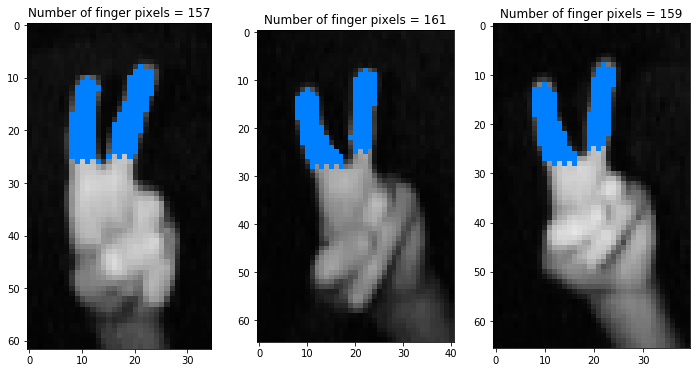

In [10]:
fig = figure(0, (12, 6))

for i in range(3):
    fig.add_subplot(1,3,i+1)
    imageDict = d[exampleIndices[i]]
    
    X1, y1 = extractFeatures(imageDict, whichImage = 'image1bit', dist = 4)    
    yImage = y1.reshape(imageDict['boxHeight'], imageDict['boxWidth'])
    
    im = makeGrayScale(imageDict)
    
    #Paint with matches:
    im[:,:,0][yImage==1] = 0
    im[:,:,1][yImage==1] = .5
    im[:,:,2][yImage==1] = 1
    
    imshow(im, interpolation = 'none')
    title('Number of finger pixels = ' + str(sum(y1==1)))

In [11]:

from viz import showMatches, bw, rw, rwb, testLogicalRules
from data_handling import breakIntoGrids, reshapeIntoImage

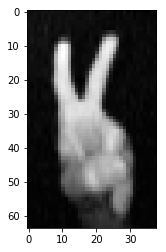

In [12]:
i = 1
grayscale_image = d[i]['image'][d[i]['boxEdges'][2]:d[i]['boxEdges'][3], d[i]['boxEdges'][0]:d[i]['boxEdges'][1]] 
imshow(grayscale_image, cmap = 'gray')

In [18]:
im = grayscale_image > 92
im[15,]

array([False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

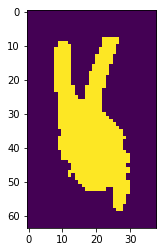

In [15]:
imshow(im)

In [20]:
X = breakIntoGrids(im, s = 9)
X

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [21]:
X.shape


(1680, 81)

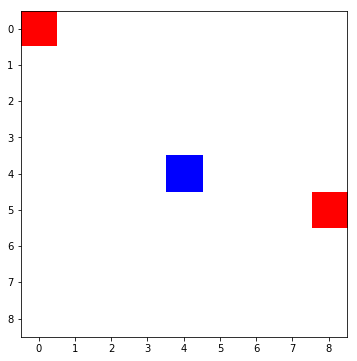

In [22]:
treeRule1 = lambda X: np.logical_and(np.logical_and(X[:, 40] == 1, X[:,0] == 0), X[:, 53] == 0)

ruleVector = np.zeros(81); ruleVector[40] = 1; ruleVector[0] = -1; ruleVector[53] = -1
fig = figure(0, (6,6)); imshow(ruleVector.reshape(9,9), interpolation = 'none', cmap = rwb)

In [24]:
yhat = treeRule1(X)

#Our vector of predictions for each pixel:
yhat

array([False, False, False, ..., False, False, False])

(64, 38)

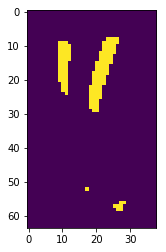

In [39]:
yhat_reshaped = reshapeIntoImage(yhat, im.shape)
imshow(yhat_reshaped)
yhat_reshaped.shape

In [40]:
yhat_reshaped[15,37]

0.0

In [42]:
count=0
flag=False
for i in range(0,38):
    if yhat_reshaped[15,i] > 0 and not flag:
        count+=1
        flag=True
    if yhat_reshaped[15,i]==0 and flag:
        flag=False
    
print(count)
        
    

2


Text(0.5, 1.0, 'After "Finger Detection"')

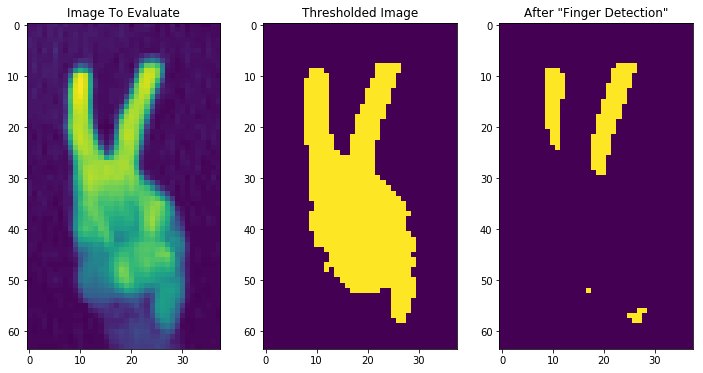

In [26]:

fig = figure(0, (12, 6))
fig.add_subplot(1,3,1); imshow(grayscale_image); title('Image To Evaluate')
fig.add_subplot(1,3,2); imshow(im); title('Thresholded Image')
fig.add_subplot(1,3,3); imshow(yhat_reshaped); title('After "Finger Detection"')